Analysing Customer Buying Habits over a Two Year Period

In [61]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs

Importing Dataset Files

In [62]:
#Importing CSV Dataset using Pandas

Marketing_analytics = pd.read_csv (r"C:\Users\cathy\OneDrive\Documents\UCDPA_CaitrionaLambert\ifood_df.csv")

pd.DataFrame(Marketing_analytics) #Turning dataset into a DataFrame
pd.set_option("display.max_columns", None) #Displaying all columns in the DataFrame

Marketing_analytics.set_index("Kidhome") #Setting index to first column in DataFrame

,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income
Kidhome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,58138
1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,46344
0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,71613
1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,26646
1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0,61223
2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1,64014
0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1,56981


In [63]:
#Importing table of data scraped from the web using requests

url = 'https://teleport.org/cities/dublin/salaries/'
r = requests.get(url)
salaries = bs(r.text, 'lxml') #Using BeautifulSoup to parse the data

table = salaries.find("table", {"class":"table___2bpz_"})

pd.read_html(str(table))[0]

,Job type,Median salary (USD),Range,Salary ranking compared to all cities
0,C Level Executive,"$98,961",NaN,138/265
1,Product Manager,"$66,347",NaN,77/265
2,Finance Manager,"$59,892",NaN,108/265
3,Hardware Engineer,"$57,723",NaN,68/265
4,IT Manager,"$56,103",NaN,114/265
5,Project Manager,"$55,175",NaN,91/265
6,Mobile Developer,"$54,921",NaN,81/265
7,Physician,"$54,394",NaN,139/265
8,Lecturer,"$52,746",NaN,63/265
9,UX Designer,"$51,364",NaN,96/265


In [64]:
#Creating Dictionary of relevant data from web scraped table to merge with Marketing_analytics DataFrame

dict_of_table = {
    "Income": [98961, 66347, 59892, 57723, 56103, 55175, 54921, 54394, 52746, 51364,
               50169, 50111, 49851, 49787, 48299, 47511, 47285, 44933, 44777, 44287,
               43541, 42968, 42854, 42518, 41365, 41180, 40243, 39971, 39332, 39026,
               37773, 37771, 37493, 36587, 36560, 36069, 35056, 33710, 33446, 32916,
               32317, 31523, 30354, 29904, 28538, 28425, 27422, 22722, 19530, 18257,
               17992, 17258],
    
    "JobType": ["C Level Executive", "Product Manager", "Finance Manager", "Hardware Engineer", "IT Manager", 
                 "Project Manager", "Mobile Developer",
                 "Physician", "Lecturer", "UX Designer", "Sales Manager", "Dentist", "Data Scientist", "Marketing Manager",
                 "Account Manager", "Research Scientist", "Business Development", "Pharmacist", "Software Engineer",
                 "Accountant", "Business Analyst", "Chemical Engineer", "HR Manager", "Operations Manager",
                 "QA Engineer", "Financial Analyst", "Systems Administrator", "Mechanical Engineer", "Electrical Engineer",
                 "Data Analyst", "Copywriter", "Web Developer", "Civil Engineer", "Architect", "Executive Assistant", "Nurse",
                 "Web Designer", "Postdoctoral Researcher", "Content Marketing", "Attorney", "Graphic Designer", "Customer Support",
                 "Office Manager", "Teacher", "Chef", "Interior Designer", "Administrative Assistant", "Receptionist", "Fashion Designer",
                 "Industrial Designer", "Cashier", "Waiter"],

    
}

jobs = pd.DataFrame (dict_of_table) #Turning dictionary into a DataFrame

jobs.set_index("Income") #Setting 'Income' column as index 
jobs.head()

,Income,JobType
0,98961,C Level Executive
1,66347,Product Manager
2,59892,Finance Manager
3,57723,Hardware Engineer
4,56103,IT Manager


Merging Datasets Together

In [65]:
#Merging both datasets together on "Income" columns using merge_asof()

Marketing_data = pd.merge_asof(Marketing_analytics.sort_values("Income"), jobs.sort_values("Income"), left_on='Income', right_on='Income', direction='nearest')
pd.set_option("display.max_columns", None) #Displaying all columns of DataFrame
Marketing_data

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income,JobType
0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,49,2201,1,0,0,0,0,0,0,1,0,0,7,6,0,1730,Waiter
1,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,41,2698,0,1,0,0,0,0,0,1,0,0,1729,1728,0,2447,Waiter
2,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,47,2601,0,0,1,0,0,0,0,1,0,0,4,3,0,3502,Waiter
3,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,57,2165,0,1,0,0,0,0,0,0,0,1,8,7,0,4023,Waiter
4,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0,4428,Waiter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0,0,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,37,2633,0,0,1,0,0,0,0,1,0,0,967,799,3,101970,C Level Executive
2201,0,0,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,43,2763,0,0,0,1,0,0,0,0,0,1,1182,1124,3,102160,C Level Executive
2202,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,102692,C Level Executive
2203,0,0,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1,50,2683,0,0,0,1,0,0,0,1,0,0,1517,1310,2,105471,C Level Executive


Cleaning of Data

In [66]:
#Checking info of each column in Marketing_data using .info()

Marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Kidhome               2205 non-null   int64 
 1   Teenhome              2205 non-null   int64 
 2   Recency               2205 non-null   int64 
 3   MntWines              2205 non-null   int64 
 4   MntFruits             2205 non-null   int64 
 5   MntMeatProducts       2205 non-null   int64 
 6   MntFishProducts       2205 non-null   int64 
 7   MntSweetProducts      2205 non-null   int64 
 8   MntGoldProds          2205 non-null   int64 
 9   NumDealsPurchases     2205 non-null   int64 
 10  NumWebPurchases       2205 non-null   int64 
 11  NumCatalogPurchases   2205 non-null   int64 
 12  NumStorePurchases     2205 non-null   int64 
 13  NumWebVisitsMonth     2205 non-null   int64 
 14  AcceptedCmp3          2205 non-null   int64 
 15  AcceptedCmp4          2205 non-null   

In [67]:
#Checking summary statistics for each column

Marketing_data.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,51622.094785
std,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,20713.063826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,1730.000000
25%,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,35196.000000
50%,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,51287.000000
75%,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,68281.000000
max,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,113734.000000


In [68]:
#Checking for Missing Values in Marketing_data DataFrame

Marketing_data.isna().any()

Kidhome                 False
Teenhome                False
Recency                 False
MntWines                False
MntFruits               False
MntMeatProducts         False
MntFishProducts         False
MntSweetProducts        False
MntGoldProds            False
NumDealsPurchases       False
NumWebPurchases         False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Complain                False
Z_CostContact           False
Z_Revenue               False
Response                False
Age                     False
Customer_Days           False
marital_Divorced        False
marital_Married         False
marital_Single          False
marital_Together        False
marital_Widow           False
education_2n Cycle      False
education_Basic         False
education_Graduation    False
education_

In [69]:
#Counting and displaying the number of duplicated rows in Marketing_data DataFrame

Marketing_data.duplicated().sum()

184

In [70]:
Marketing_data.loc[Marketing_data.duplicated(), :]

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income,JobType
32,0,0,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0,31,2197,1,0,0,0,0,0,0,0,1,0,26,22,0,10979,Waiter
58,1,0,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1,41,2786,1,0,0,0,0,0,0,1,0,0,18,5,1,15287,Waiter
60,0,0,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0,50,2489,0,1,0,0,0,1,0,0,0,0,47,30,0,15315,Waiter
81,1,1,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0,60,2293,0,0,0,1,0,0,0,0,1,0,41,35,0,17144,Waiter
100,0,0,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0,61,2707,0,1,0,0,0,0,0,1,0,0,41,22,0,18690,Industrial Designer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0,0,88,714,76,395,116,0,12,1,4,6,9,1,0,0,0,0,0,0,3,11,1,58,2581,1,0,0,0,0,0,0,0,0,1,1301,1289,0,85696,C Level Executive
2138,0,0,96,899,102,838,133,102,40,1,5,6,10,2,0,0,0,0,0,0,3,11,1,48,2814,0,0,1,0,0,0,0,0,0,1,2074,2034,0,86857,C Level Executive
2147,0,1,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1,61,2562,0,0,0,1,0,0,0,1,0,0,1924,1891,4,87771,C Level Executive
2189,0,0,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1,67,2641,0,0,0,1,0,0,0,1,0,0,2130,1958,3,94384,C Level Executive


In [71]:
#Dropping duplicate rows from Marketing_data DataFrame

Marketing_data.drop_duplicates()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income,JobType
0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,49,2201,1,0,0,0,0,0,0,1,0,0,7,6,0,1730,Waiter
1,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,41,2698,0,1,0,0,0,0,0,1,0,0,1729,1728,0,2447,Waiter
2,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,47,2601,0,0,1,0,0,0,0,1,0,0,4,3,0,3502,Waiter
3,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,57,2165,0,1,0,0,0,0,0,0,0,1,8,7,0,4023,Waiter
4,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0,4428,Waiter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0,0,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1,37,2633,0,0,1,0,0,0,0,1,0,0,967,799,3,101970,C Level Executive
2201,0,0,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1,43,2763,0,0,0,1,0,0,0,0,0,1,1182,1124,3,102160,C Level Executive
2202,0,0,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1,46,2609,1,0,0,0,0,0,0,1,0,0,964,816,4,102692,C Level Executive
2203,0,0,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1,50,2683,0,0,0,1,0,0,0,1,0,0,1517,1310,2,105471,C Level Executive


In [72]:
#Renaming Columns in Marketing_data in order to tidy up the DataFrame
    
Marketing_data.rename(columns = {'Response':'AcceptedFinalCmp', 'MntMeatProducts': 'MntMeats', 'MntFishProducts': 'MntFish',
                                'MntSweetProducts': 'MntSweets', 'MntGoldProds': 'MntGold', 'NumCatalogPurchases': 'NumCataloguePurchases'}, inplace = True)

Marketing_data.head()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,NumDealsPurchases,NumWebPurchases,NumCataloguePurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedFinalCmp,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Income,JobType
0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,49,2201,1,0,0,0,0,0,0,1,0,0,7,6,0,1730,Waiter
1,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,41,2698,0,1,0,0,0,0,0,1,0,0,1729,1728,0,2447,Waiter
2,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,47,2601,0,0,1,0,0,0,0,1,0,0,4,3,0,3502,Waiter
3,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,57,2165,0,1,0,0,0,0,0,0,0,1,8,7,0,4023,Waiter
4,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,51,2426,0,1,0,0,0,0,0,1,0,0,38,-283,0,4428,Waiter


Analysing the Success of Each Marketing Campaign

In [73]:
#Calculating and sorting the total number of campaigns accepted by customers

Marketing_data[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedFinalCmp"]].sum().sort_values()

AcceptedCmp2         30
AcceptedCmp1        142
AcceptedCmp5        161
AcceptedCmp3        163
AcceptedCmp4        164
AcceptedFinalCmp    333
dtype: int64

Text(0, 0.5, 'Marketing_campaign')

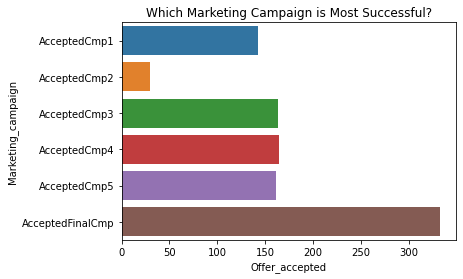

In [74]:
#Creating a Barplot to visualise which marketing campaign was most successful among customers

Marketing_campaign = ["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedFinalCmp"]
Offer_accepted = [142, 30, 163, 164, 161, 333]

sns.barplot(x= Offer_accepted, y= Marketing_campaign)
plt.title("Which Marketing Campaign is Most Successful?")
plt.xlabel("Offer_accepted")
plt.ylabel("Marketing_campaign")

Analysing which Sales Channels are Underperforming

In [75]:
#Calculating and sorting the total number of purchases made through the different marketing channels

Marketing_data[["NumWebPurchases", "NumCataloguePurchases", "NumStorePurchases"]].sum().sort_values()

NumCataloguePurchases     5833
NumWebPurchases           9042
NumStorePurchases        12841
dtype: int64

Text(0, 0.5, 'Sales_channel')

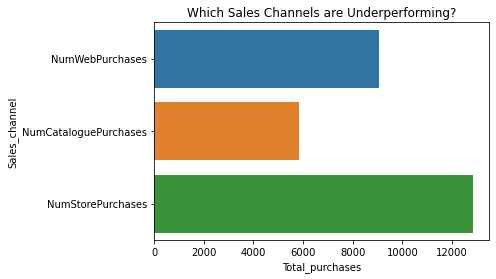

In [76]:
#Creating a Barplot to visualise which sales channels are underperforming

Sales_channel = ["NumWebPurchases", "NumCataloguePurchases", "NumStorePurchases"]
Total_purchases = [9042, 5833, 12841]

sns.barplot(y= Sales_channel, x= Total_purchases)
plt.title("Which Sales Channels are Underperforming?")
plt.xlabel("Total_purchases")
plt.ylabel("Sales_channel")

Analysing Campaign Acceptance

In [77]:
#Selecting specific columns from Marketing_data using .loc()

Campaign = Marketing_data.loc[:, ["Income", "AcceptedCmpOverall", "MntTotal"]]

In [78]:
#Using a conditional 'If' statement on "AcceptedCmpOverall" column. If value is greater than 0, the result is 'yes', else the value is 'No'

def accepted_campaign(row): #Defining custom function called 'accepted_campaign'


    if row > 0:
        result = 'Yes'


    else:
        result = 'No'


    return result


Campaign['AcceptedCampaign'] = Campaign['AcceptedCmpOverall'].apply(accepted_campaign)

Campaign

,Income,AcceptedCmpOverall,MntTotal,AcceptedCampaign
0,1730,0,7,No
1,2447,0,1729,No
2,3502,0,4,No
3,4023,0,8,No
4,4428,0,38,No
...,...,...,...,...
2200,101970,3,967,Yes
2201,102160,3,1182,Yes
2202,102692,4,964,Yes
2203,105471,2,1517,Yes


(0.0, 2646.7806434448444)

<Figure size 864x576 with 0 Axes>

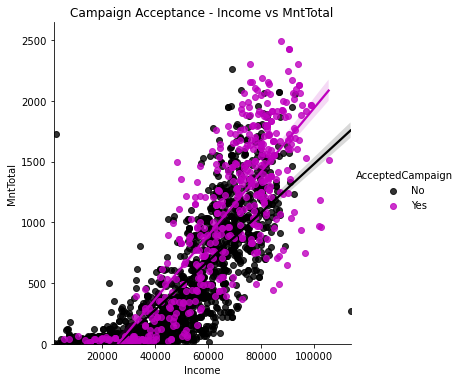

In [79]:
#Creating a lmplot to compare income and MntTotal, adding "AcceptedCampaign" column as the hue 

plt.figure(figsize=(12,8))

income_Mnt = sns.lmplot(y='MntTotal', x='Income', data=Campaign, hue='AcceptedCampaign', palette=dict(Yes="m", No="k"))
plt.title("Campaign Acceptance - Income vs MntTotal") #Setting title of plot
axes = income_Mnt.axes

axes[0,0].set_ylim(0,) #Setting y-axis to begin at 0

(0.0, 2647.181277038863)

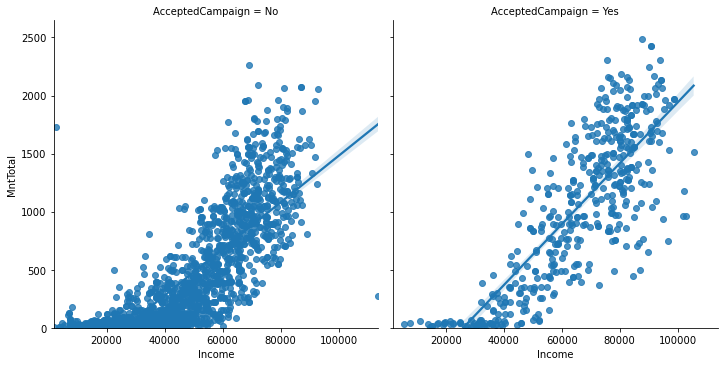

In [80]:
#Separating out the above lmplot into separate plots based on those who accepted a campaign and those who didn't

income_Mnt = sns.lmplot(y='MntTotal', x='Income', data=Campaign, col='AcceptedCampaign')

axes = income_Mnt.axes

axes[0,0].set_ylim(0,) #Setting the y-axis to 0

Analysing Amount Spent on Each Product Category

In [81]:
#Selecting specific columns from Marketing_data using .loc()

Mnt_sales = Marketing_data.loc[:, ["Income", "MntWines", "MntFruits", "MntMeats", "MntFish", "MntSweets", "MntGold"]]

Mnt_sales

,Income,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold
0,1730,1,1,3,1,1,1
1,2447,1,1,1725,1,1,1
2,3502,2,1,1,0,0,1
3,4023,5,0,1,1,1,1
4,4428,16,4,12,2,4,321
...,...,...,...,...,...,...,...
2200,101970,722,27,102,44,72,168
2201,102160,763,29,138,76,176,58
2202,102692,168,148,444,32,172,148
2203,105471,1009,181,104,202,21,207


In [82]:
#Using .melt() to add all Mnt categories into one column for plotting

dfm = Mnt_sales.melt('Income', var_name='MntProds', value_name='TotalSpent')

dfm.head()

,Income,MntProds,TotalSpent
0,1730,MntWines,1
1,2447,MntWines,1
2,3502,MntWines,2
3,4023,MntWines,5
4,4428,MntWines,16


(0.0, 1826.686860313407)

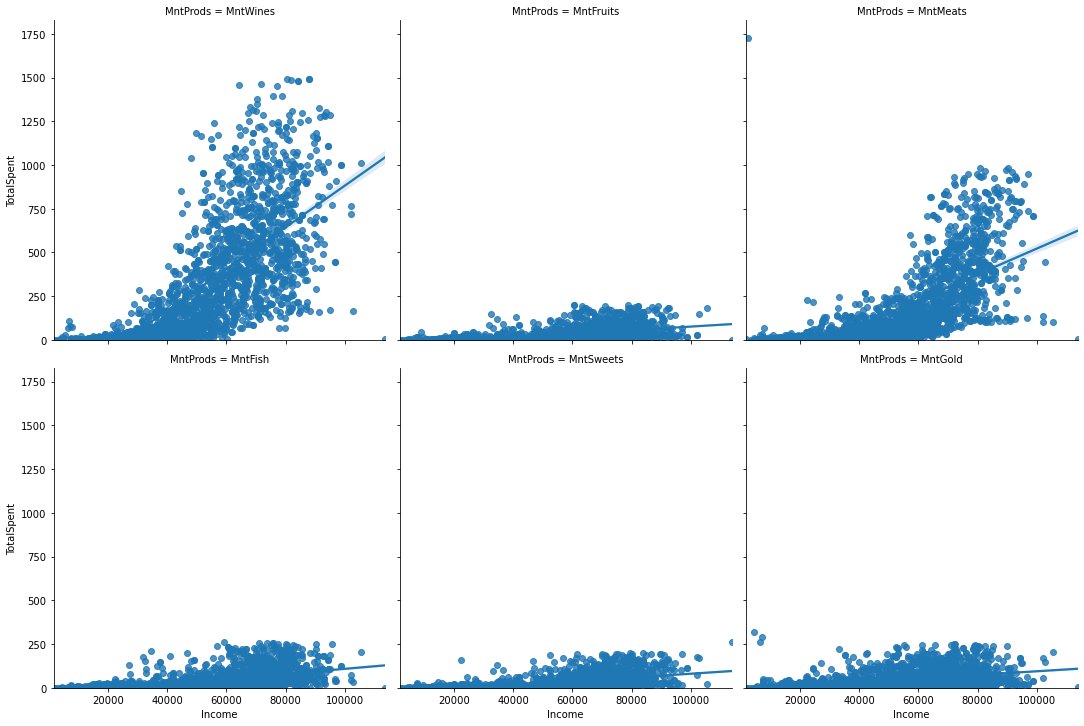

In [83]:
#Using lmplot to compare amount spent on product categories versus income

Sales_by_Category = sns.lmplot(x="Income", y="TotalSpent", col='MntProds', col_wrap=3, data=dfm)

axes = Sales_by_Category.axes

axes[0].set_ylim(0,) #Setting y-axis of plots to 0

Analysing Total Spend Per Job Type

In [84]:
#Grouping 'Income' and 'JobType' columns, selecting 'MntTotal' column and taking the mean

new_df = Marketing_data.groupby(["Income", "JobType"])["MntTotal"].mean()
new_df = new_df.reset_index() #Resetting index

new_df

,Income,JobType,MntTotal
0,1730,Waiter,7.0
1,2447,Waiter,1729.0
2,3502,Waiter,4.0
3,4023,Waiter,8.0
4,4428,Waiter,38.0
...,...,...,...
1958,101970,C Level Executive,967.0
1959,102160,C Level Executive,1182.0
1960,102692,C Level Executive,964.0
1961,105471,C Level Executive,1517.0


(0.0, 119334.2)

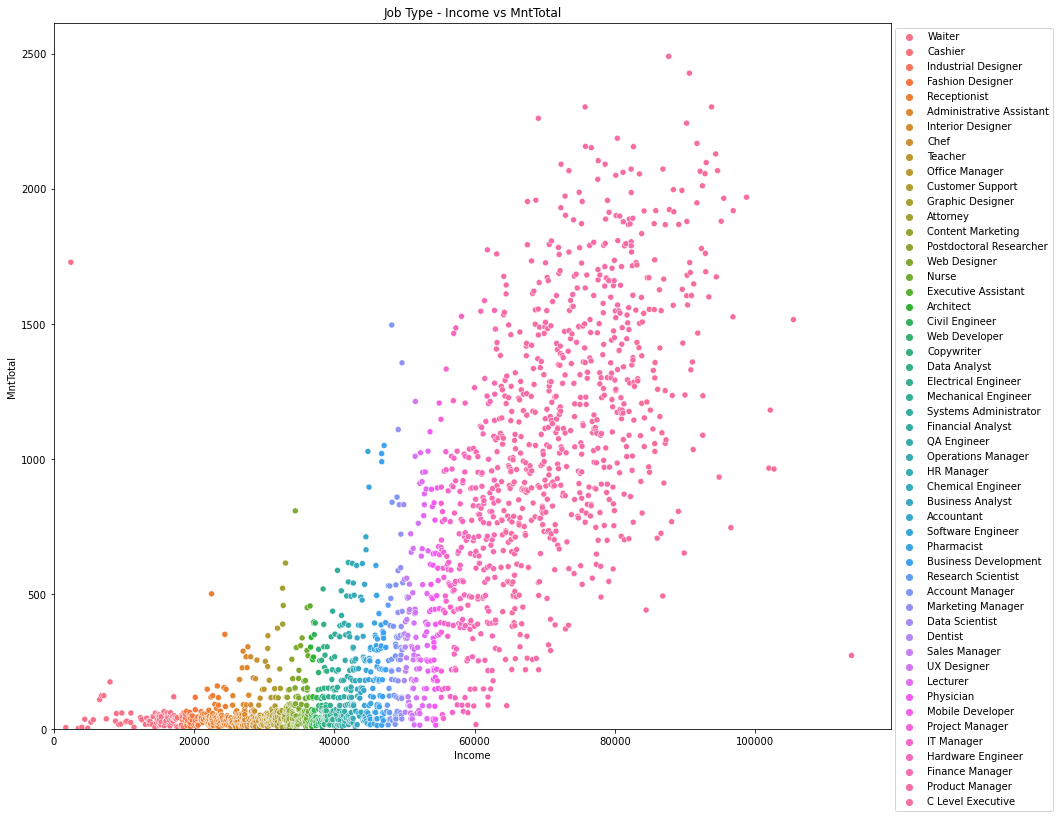

In [85]:
#Using Scatterplot to compare customers' Income versus MntTotal based on JobType

plt.figure(figsize=(15,13)) #Setting size of figure
plot = sns.scatterplot(x='Income', y='MntTotal', hue='JobType', data=new_df)
plot.legend(bbox_to_anchor= (1.2,1)) #Specifying legend location
plt.title("Job Type - Income vs MntTotal") #Setting title of plot
plt.ylim(0,) #Setting y-axis to 0
plt.xlim(0,) #Setting x-axis to 0